In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Zoo.csv')
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

In [6]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [28]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
x=data.drop('type',axis=1)
y=data['type']

In [8]:
x

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [9]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

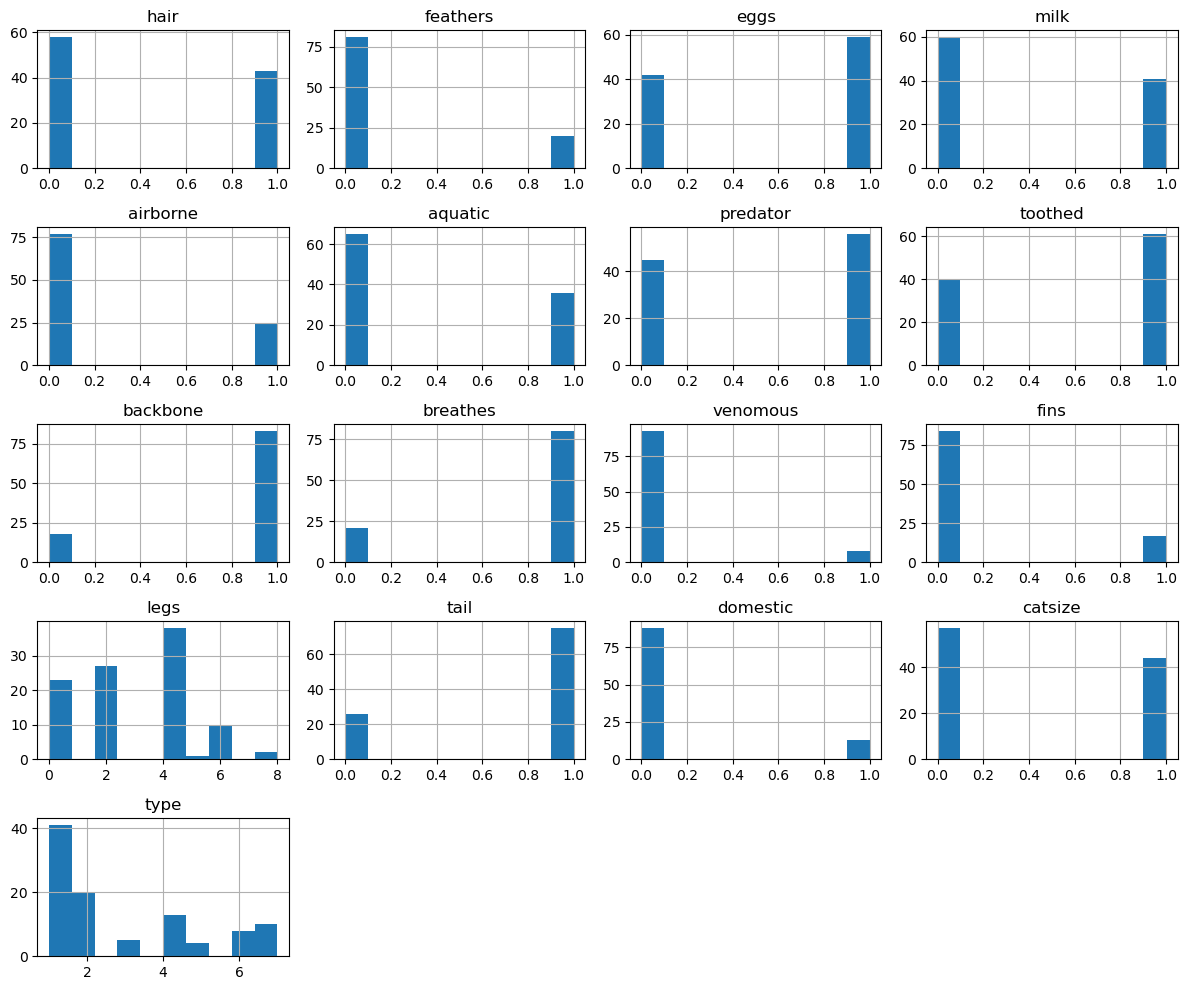

In [11]:
# Histograms or Bar Plots
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

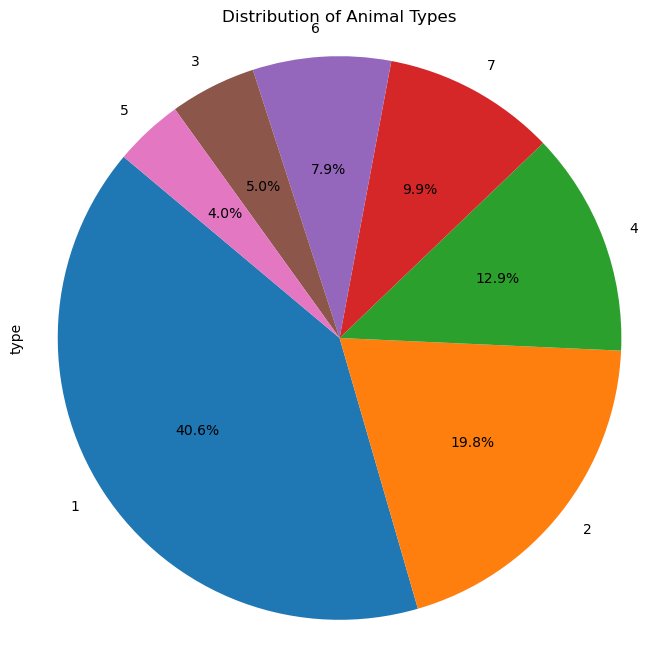

In [12]:
# Pie Chart
plt.figure(figsize=(8, 8))
data['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Animal Types')
plt.show()

C:\Users\pavan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


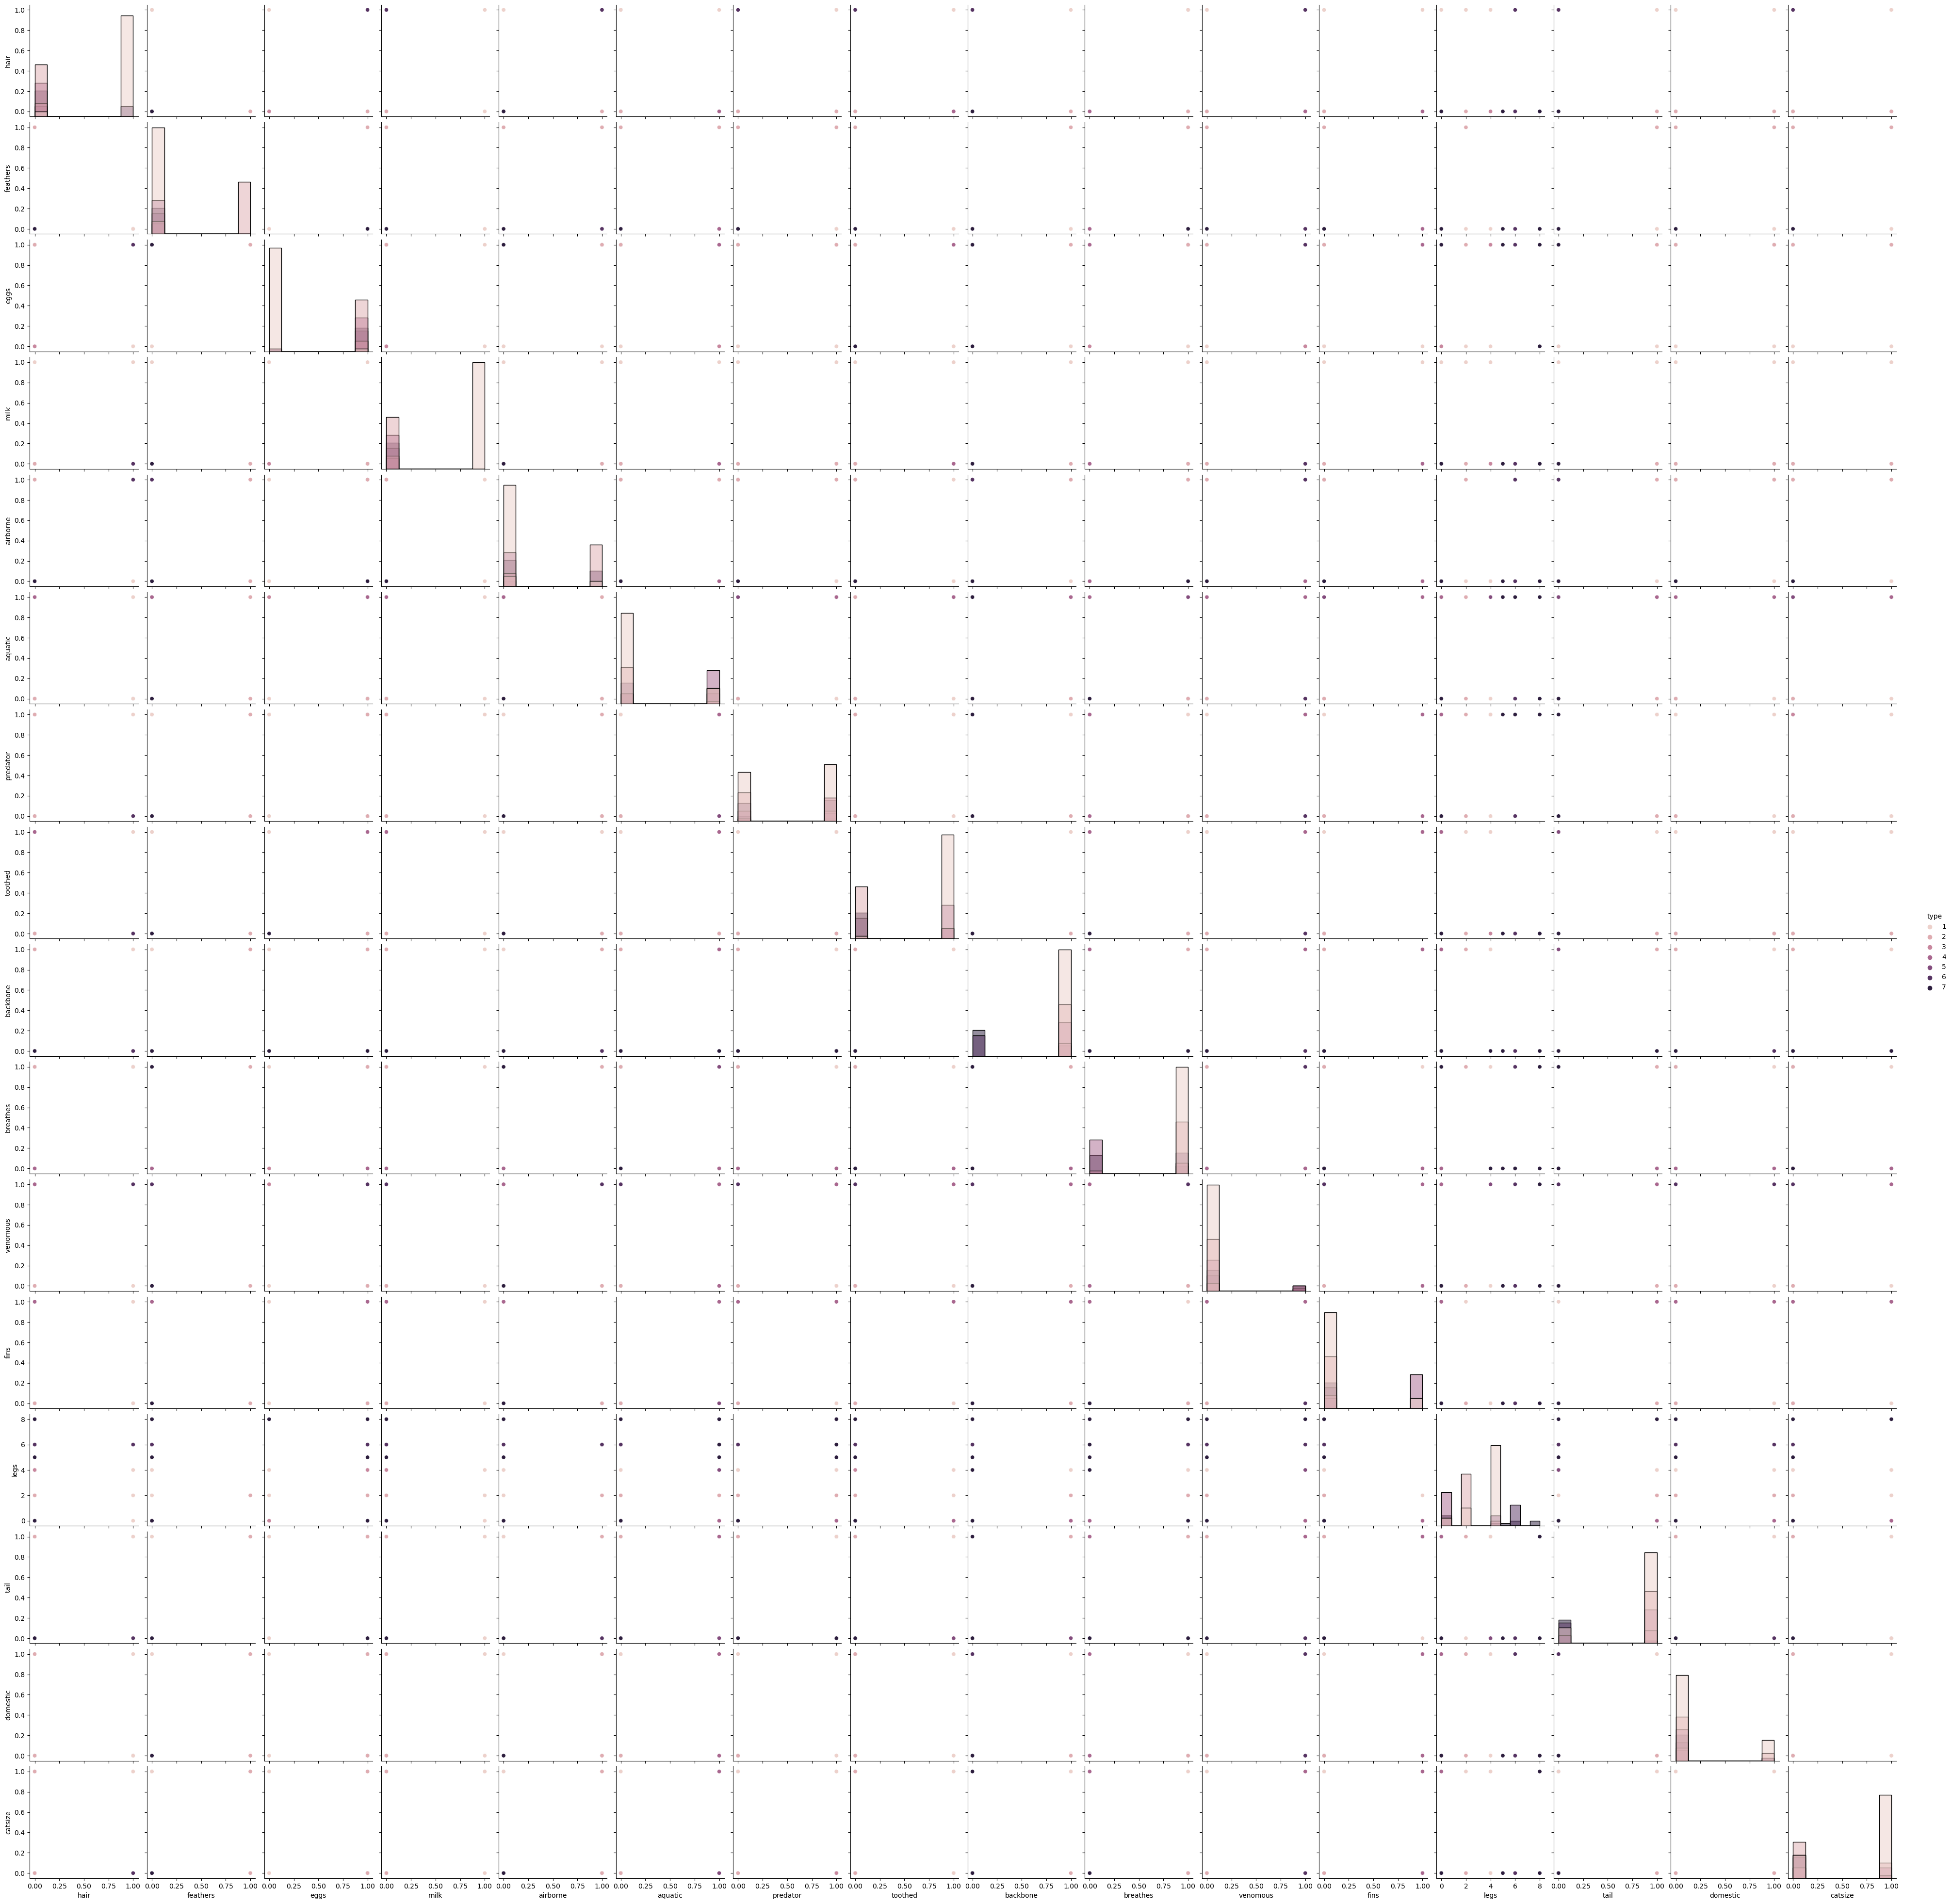

In [13]:
# Pairwise Scatter Plot
sns.pairplot(data, hue='type', diag_kind='hist')
plt.show()

C:\Users\pavan\AppData\Local\Temp\ipykernel_312\2632941288.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


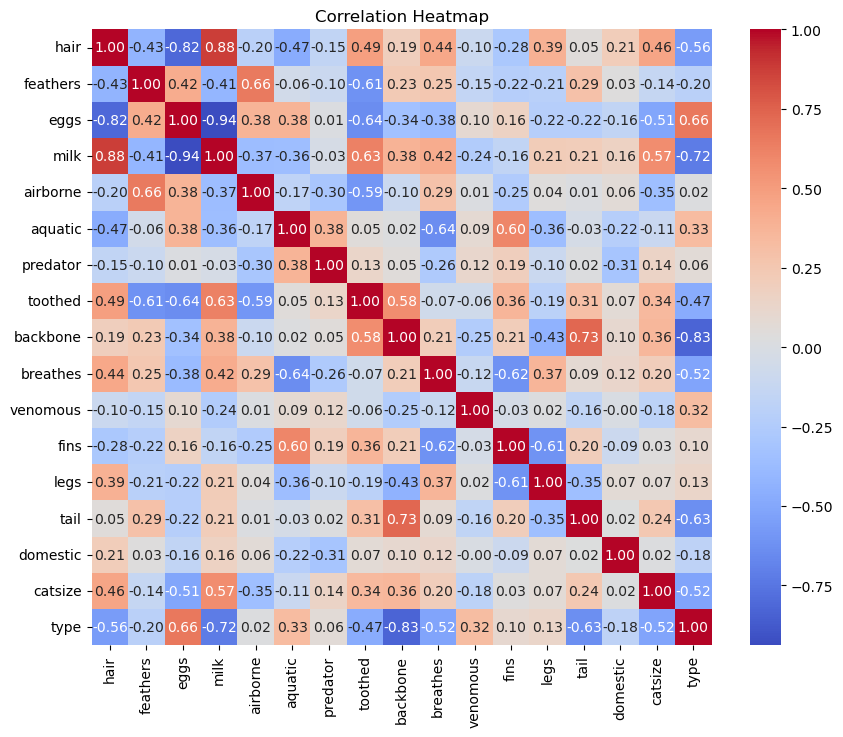

In [14]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

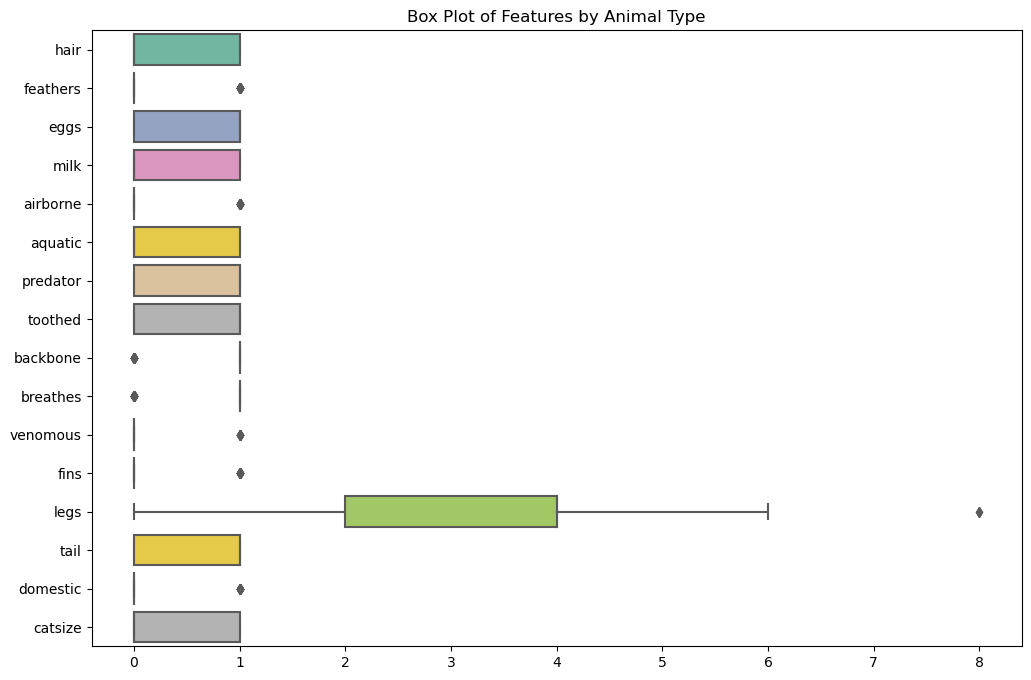

In [15]:
# Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop('type', axis=1), orient="h", palette="Set2")
plt.title('Box Plot of Features by Animal Type')
plt.show()

In [62]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [63]:
# Separate features and target variable
X = data_imputed.drop('type', axis=1)
y = data_imputed['type']

In [64]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (80, 17) (80,)
Testing set shape: (21, 17) (21,)


In [66]:
zoo_data=pd.read_csv('Zoo.csv',header=None, names=column_names)

In [67]:
# Split features and target variable
X = zoo_data.drop(['animal_name', 'class_type'], axis=1)
y = zoo_data['class_type']

In [81]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [82]:
# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

In [83]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [84]:
y_test

30        1
67        1
62        4
47        7
42        2
40        6
90        5
45        1
10        1
0      type
18        1
31        6
97        1
85        1
76        1
4         1
79        2
33        1
12        2
26        5
100       7
53        5
22        2
68        1
44        2
98        6
Name: class_type, dtype: object

In [87]:
params={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

In [88]:
grid_search=GridSearchCV(knn,params)